In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import operator
import numpy as np

In [30]:
games= pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv", header="infer")
games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Worms 2,PC,1997.0,Strategy,Microprose,0.00,0.01,0.00,0.00,0.01,NaN,NaN,8.1,12.0,Team 17,K-A
16715,Victory Spike,PS,1996.0,Sports,Imagineer,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Meru Purana,PS,1996.0,Strategy,Gust,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Psychic Detective,PS,1995.0,Adventure,Electronic Arts,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


## cleaning data

In [13]:
games = games[games["Name"].notnull()]
games = games[games["Genre"].notnull()]
games = games[games["Year_of_Release"].notnull()]




In [28]:
#games.to_csv("games_clean.csv",index=False)
    

In [26]:
games_df = games.drop(columns=["Critic_Score","Critic_Count","User_Score","User_Count","Developer","Rating"])
games_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16714,Worms 2,PC,1997.0,Strategy,Microprose,0.00,0.01,0.00,0.00,0.01
16715,Victory Spike,PS,1996.0,Sports,Imagineer,0.00,0.00,0.01,0.00,0.01
16716,Meru Purana,PS,1996.0,Strategy,Gust,0.00,0.00,0.01,0.00,0.01
16717,Psychic Detective,PS,1995.0,Adventure,Electronic Arts,0.01,0.00,0.00,0.00,0.01


In [29]:
#games_df.to_csv("games_sales_clean.csv",index=False)

In [95]:
games= pd.read_csv("games_sales_clean.csv", header="infer")
games=games[games.Year_of_Release >=2000]
games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92
...,...,...,...,...,...,...,...,...,...,...
16439,The Longest 5 Minutes,PSV,2016,Action,Nippon Ichi Software,0.00,0.00,0.01,0.00,0.01
16440,Strawberry Nauts,PSV,2016,Adventure,Unknown,0.00,0.00,0.01,0.00,0.01
16441,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16442,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01


In [96]:
games_global_sales=games.groupby(["Year_of_Release"]).Global_Sales.sum()

<AxesSubplot:title={'center':'Global Sales'}, xlabel='Years', ylabel='Sales(Mln)'>

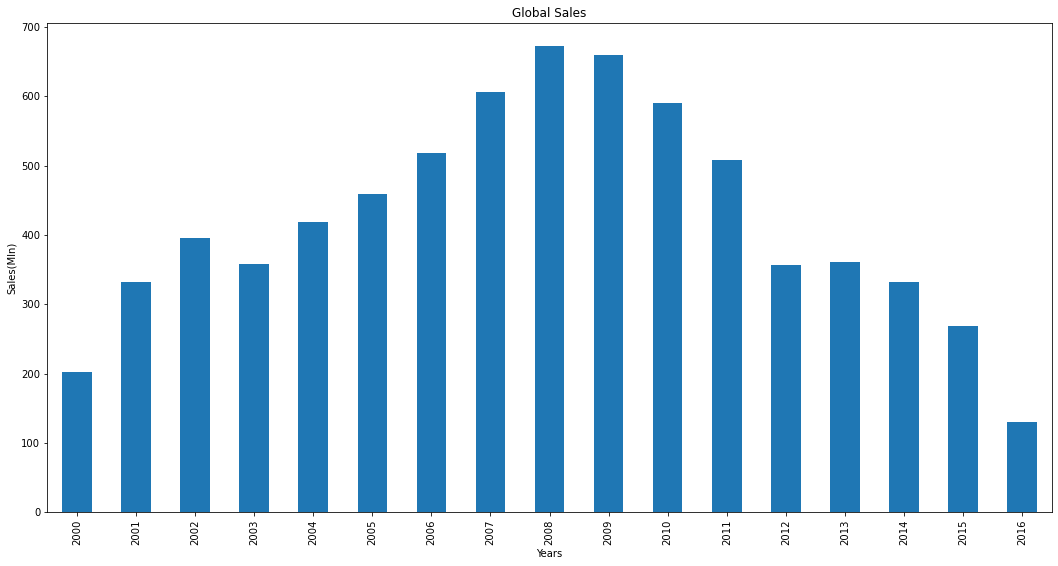

In [102]:
games_global_sales.plot.bar(figsize =(18,9),
                        title="Global Sales",
                        xlabel="Years",
                        ylabel="Sales(Mln)")                                                                
                                                                                         
                                                                                         
                                                                                          

In [119]:
games_NA_sales=games.groupby(["Year_of_Release"]).NA_Sales.sum()
games_EU_sales=games.groupby(["Year_of_Release"]).EU_Sales.sum()
games_JP_sales=games.groupby(["Year_of_Release"]).JP_Sales.sum()


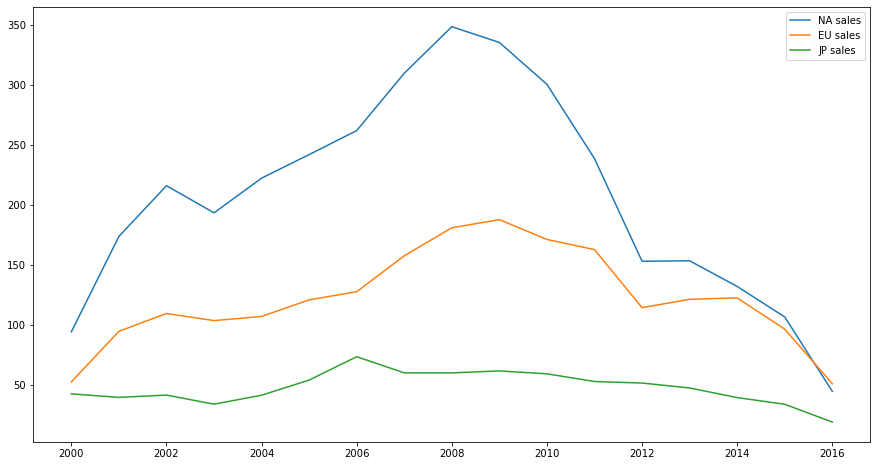

In [120]:
plt.figure(figsize=(15, 8))
plt.plot(games_NA_sales)
plt.plot(games_EU_sales)
plt.plot(games_JP_sales)
plt.legend(["NA sales", "EU sales", "JP sales"])



In [121]:
games_NA_sales=games.groupby(["Year_of_Release"]).NA_Sales.sum().reset_index()
games_EU_sales=games.groupby(["Year_of_Release"]).EU_Sales.sum().reset_index()
games_JP_sales=games.groupby(["Year_of_Release"]).JP_Sales.sum().reset_index()

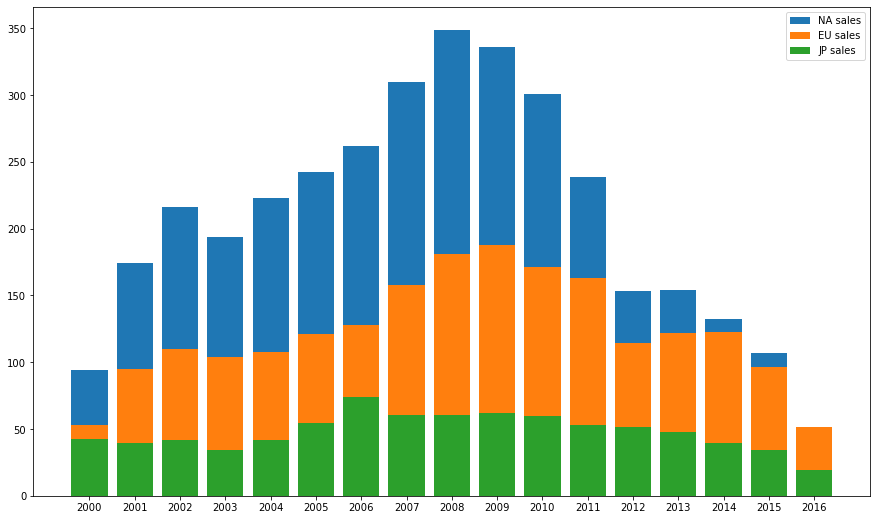

In [122]:
plt.figure(figsize=(15, 9))
plt.bar(games_NA_sales["Year_of_Release"],games_NA_sales["NA_Sales"],tick_label=np.arange(2000,2017,1))
plt.bar(games_EU_sales["Year_of_Release"],games_EU_sales["EU_Sales"],tick_label=np.arange(2000,2017,1))
plt.bar(games_JP_sales["Year_of_Release"],games_JP_sales["JP_Sales"],tick_label=np.arange(2000,2017,1))
plt.legend(["NA sales", "EU sales", "JP sales"])